In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('school-shootings-data.csv',index_col = 0)

In [4]:
Year_enroll = df[['year','enrollment']] 

In [5]:
Year_enroll['enrollment'] = Year_enroll['enrollment'].str.replace(',', '')
Year_enroll['enrollment'] = Year_enroll['enrollment'].astype(int)

/Users/vishalmishra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vishalmishra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
Year_enroll_M = Year_enroll[['year','enrollment']].apply(pd.to_numeric)

In [7]:
Year_enroll_M.shape

(217, 2)

In [8]:
Year_enroll_M1 = Year_enroll_M.groupby(['year']).mean() 

In [9]:
type(Year_enroll_M1)

pandas.core.frame.DataFrame

In [10]:
Year_enroll_M1=Year_enroll_M1.reset_index()

In [11]:
Year_enroll_M1

,year,enrollment
0,1999,1335.000000
1,2000,841.083333
2,2001,1644.538462
3,2002,1622.000000
4,2003,1169.000000
5,2004,926.444444
6,2005,827.000000
7,2006,1214.333333
8,2007,1102.300000
9,2008,1107.666667


In [12]:
Year_enroll_M1.shape

(20, 2)

In [22]:
plt.bar(Year_enroll_M1.year, Year_enroll_M1.enrollment)
plt.xlabel("Year")
plt.ylabel("Emrollment decreased after attacks")
plt.title("Decrease of Enrollment after1999")

Text(0.5,1,'Decrease of Enrollment after1999')

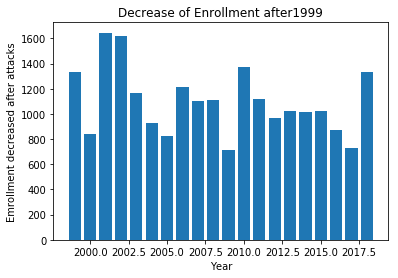

In [23]:
plt.show()

In [19]:
df_Crime = df[['date','year']] 

In [20]:
df_Crime['date'] = df['date'].str.extract('(\d*)',expand = True)

/Users/vishalmishra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_Crime[['year','date']] = df_Crime[['year','date']].apply(pd.to_numeric)

/Users/vishalmishra/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [24]:
df_Crime = df_Crime.groupby(['year','date']).size().to_frame('size')

In [25]:
df_Crime=df_Crime.reset_index()

In [26]:
df_Crime

,year,date,size
0,1999,4,2
1,1999,5,1
2,1999,10,1
3,1999,11,2
4,1999,12,1
5,2000,1,2
6,2000,2,4
7,2000,4,1
8,2000,5,2
9,2000,7,1


In [27]:
plt.bar(df_Crime.year, df_Crime.date)
plt.xlabel("Year")
plt.ylabel("Number of Crimes per months")
plt.title("Per month crime need to be assessed by Police")



Text(0.5,1,'Per month crime need to be assessed by Police')

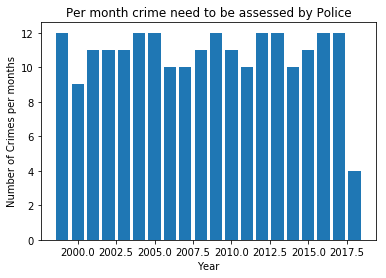

In [28]:
plt.show()

<Figure size 432x288 with 0 Axes>

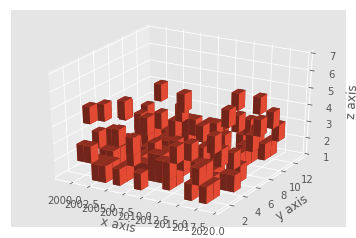

In [32]:
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = df_Crime['year'].values
y3 = df_Crime['date'].values
z3 = df_Crime['size'].values

dx = np.ones((len(df_Crime['year'].values)))
dy = np.ones((len(df_Crime['date'].values)))
dz = np.ones((len(df_Crime['size'].values)))

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()